# Key I-94 Traffic Volume Indicators Analysis

The goal of this project is to determine what variables are strong indicators of heavy westbound traffic on the I-94 Highway. The dataset was sourced from [here](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) and includes hourly traffic volumes between 2012 and 2018. I considered various variables including month, day of week, hour of day, and weather classifications to arrive at several key indicators of traffic volume.

I conclude that median daytime traffic is roughly 4× greater than median nighttime traffic, average monthly traffic peaks during the summer and dips during the winter, weekdays are significantly busier than weekends in all daytime hours, rush hours are during 8 a.m. and 4 p.m., and only "shower drizzle" and "light rain and snow" are possible weather indicators on increased traffic load.

These results may be used by municipal planners and highway managers as a baseline for traffic management. It may also be used to minimize necessary disruptions such as construction on the I-94 as much as possible.

## Preparing for Analysis

I begin by importing the relevant Python libraries to this project and understanding the composition of the dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # set the seaborn theme

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset includes 9 different columns containing 48204 rows of information (including the header) with various datatypes. 

To examine the columns more closely, I can display the first ten rows. The columns appear to be self-explanatory and there is no obvious evidence for needing to data clean. Additionally, the dataset [documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)  assures me that there are no null values. As such, I can proceed to analysis.



In [2]:
traffic.head(10)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


## Traffic Volume Analysis

According to the [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume), the westbound traffic was collected from a station midway between Minneapolis and Saint Paul. As such, my analysis results cannot be generalized to the entire I-94 Highway, but rather only in the westbound stretch around that station.

To begin my traffic analysis, I can visualize the distribution of the traffic volume with a historgram and consider its key descriptors.

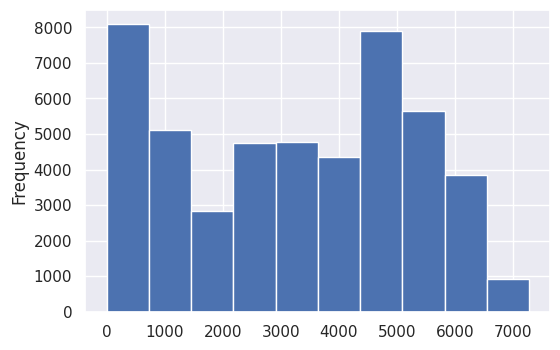

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [3]:
traffic['traffic_volume'].plot.hist()
plt.show()

traffic['traffic_volume'].describe()


The mean traffic volume is roughly 3260 cars passing by the station per hour, and the volume ranges from over 7000 cars/hour to 0 cars/hour.

Interestingly, there appear to be two clear spikes in traffic volume: 0–1000 cars/hour and 5000–6000 cars/hour both had a frequency of roughly 8000 from 2012–2018. In other words, these two volumes ranges appeared for roughly 8000 hours in the six year period, significantly more than other volume ranges.

I can hypothesize that the contrast between daytime and nighttime traffic volumes was a big influence on these two spikes in traffic volume, so I will consider this factor next.

### Influence of Day Vs. Night on Traffic Volume

To compare how traffic volumes differ based on time of day, I will divide the dataset into two parts, with daytime defined as the hours after 7 a.m. to 7 p.m. and nighttime defined as the hours after 7 p.m. to 7 a.m.

In [4]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic[(traffic['date_time'].dt.hour > 7) & (traffic['date_time'].dt.hour <= 19)]
night = traffic[(traffic['date_time'].dt.hour > 19) | (traffic['date_time'].dt.hour <= 7)]  
    
print(day.info())
print('\n')
print(night.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23759 entries, 0 to 48199
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23759 non-null  object        
 1   temp                 23759 non-null  float64       
 2   rain_1h              23759 non-null  float64       
 3   snow_1h              23759 non-null  float64       
 4   clouds_all           23759 non-null  int64         
 5   weather_main         23759 non-null  object        
 6   weather_description  23759 non-null  object        
 7   date_time            23759 non-null  datetime64[ns]
 8   traffic_volume       23759 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24445 entries, 11 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------

The day dataset now has 23759 rows of data, while the night dataset has 24445; the difference can be attributed to the occasional hour of missing data, such as if the station malfunctions or experiences an outage. As this does not significantly affect my analysis, I can create histograms of both datasets as well as of the entire traffic dataset on a grid chart to compare the traffic volume distributions.

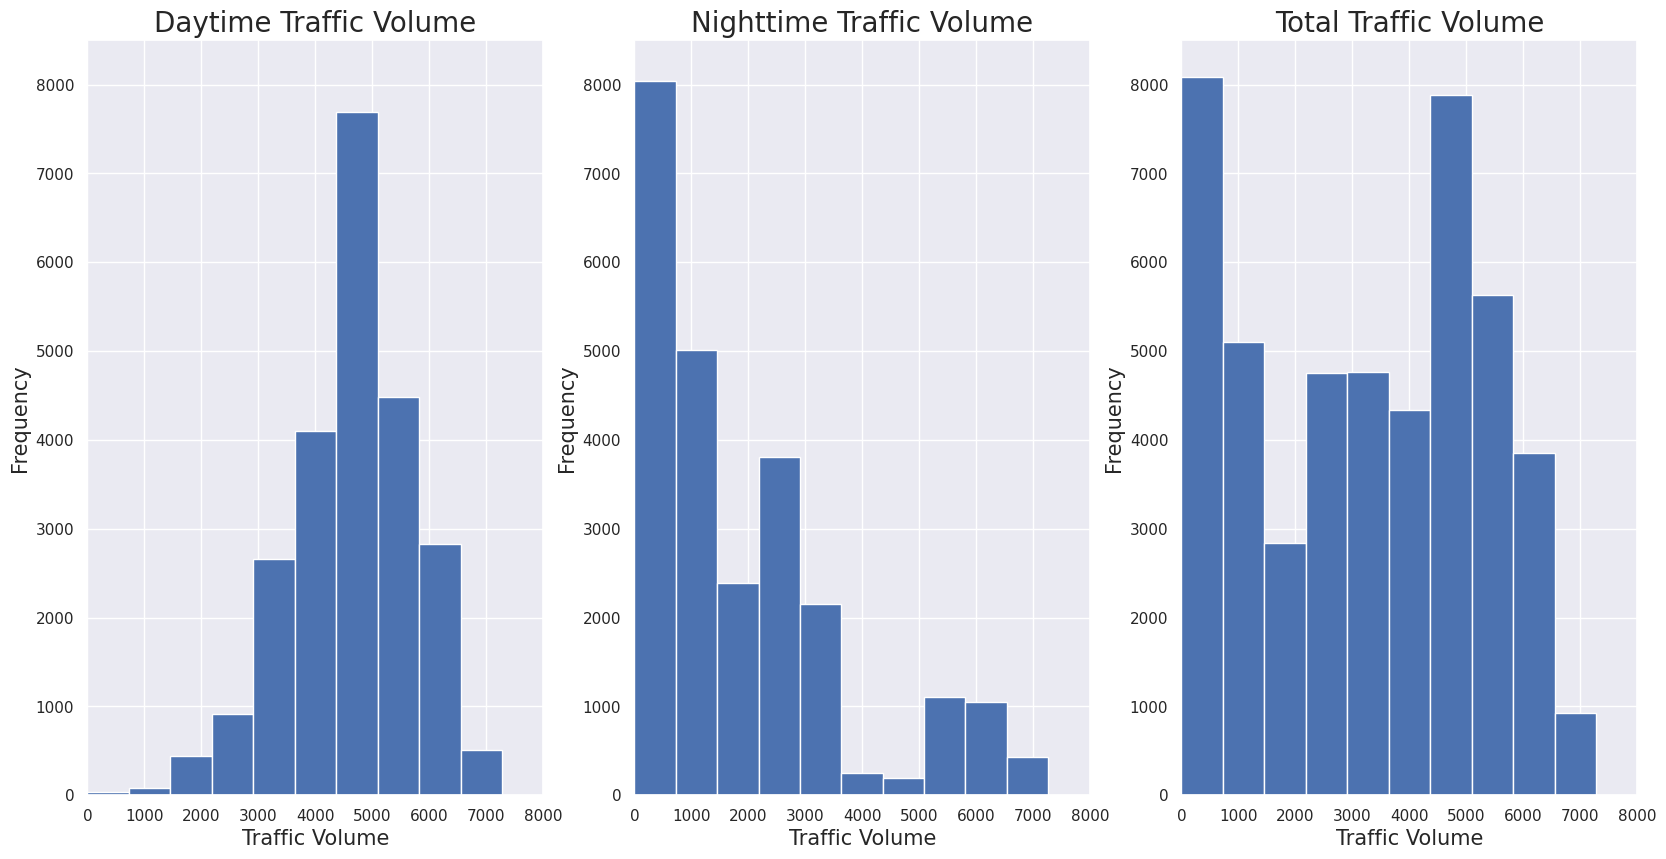

In [5]:
plt.figure(figsize = (20, 10))

plt.subplot(1, 3, 1)
plt.hist(day['traffic_volume'])
plt.xlabel('Traffic Volume', fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Daytime Traffic Volume', fontsize = 20)
plt.xlim(0, 8000)
plt.ylim(0, 8500)

plt.subplot(1, 3, 2)
plt.hist(night['traffic_volume'])
plt.xlabel('Traffic Volume', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Nighttime Traffic Volume', fontsize = 20)
plt.xlim(0, 8000)
plt.ylim(0, 8500)

plt.subplot(1, 3, 3)
traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Total Traffic Volume', fontsize = 20)
plt.xlim(0, 8000)
plt.ylim(0, 8500)
plt.show()

The traffic volumes between daytime and nighttime clearly show very different distributions: the daytime histogram appears to be slightly left-skewed with traffic volume around 5000 as its highest frequency, whereas the nighttime histogram is very right-skewed with its highest frequency being the 0–1000 traffic volume range. Together, each individual graph accounts for one of the peaks in the total traffic volume histogram. I can now generate more specific statistics for the time datasets:

In [6]:
day['traffic_volume'].describe()

count    23759.00000
mean      4641.33924
std       1068.65102
min          0.00000
25%       4049.00000
50%       4708.00000
75%       5337.00000
max       7280.00000
Name: traffic_volume, dtype: float64

In [7]:
night['traffic_volume'].describe()

count    24445.000000
mean      1917.067089
std       1736.799020
min          0.000000
25%        532.000000
50%       1242.000000
75%       2772.000000
max       7260.000000
Name: traffic_volume, dtype: float64

As the distributions are skewed, the mean statistic is not entirely accurate. Instead, I look at the 50th percentile: the median daytime traffic volume is 4708 cars/hour, while the median nighttime traffic voume is just 1242 cars/hour. With almost four times as much median traffic in the day as night, there appears to be a very strong connection between the daytime vs. nighttime and traffic volume on the I-94. This, of course, makes logical sense.

However, because the goal of this project is to determine indicators of heavy traffic, the nighttime data is less relevant due to its low traffic volumes. As such, I will only use the daytime dataset from now onwards.

### Influence of Date and Time on Traffic Volume

Even within just the daytime data, there may be specific factors that contribute greatly to heavy traffic. For example, the month, day of the week, or specific time of day may all play a role. I will now examine each of these factors individually.

#### Monthly Traffic Average

I can use how the average traffic volume changes with the above variables to visualize any potential relationships. I begin with the monthly averages.

In [19]:
day['month'] = day.loc[:, 'date_time'].dt.month
monthly_average = day.groupby('month').mean()
monthly_average['traffic_volume']

month
1     4379.382785
2     4577.445087
3     4755.891671
4     4742.272508
5     4769.600454
6     4787.214477
7     4494.121650
8     4799.611891
9     4745.968382
10    4812.563146
11    4574.138274
12    4313.228426
Name: traffic_volume, dtype: float64

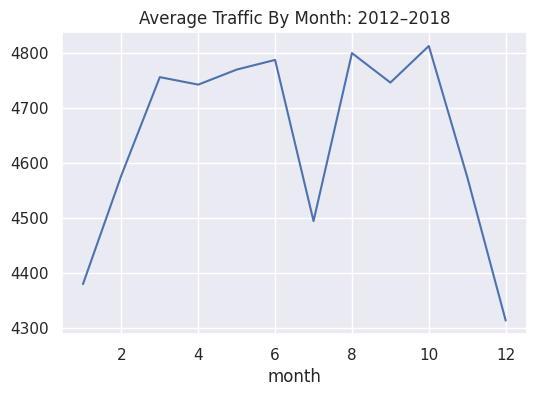

In [9]:
monthly_average['traffic_volume'].plot()
plt.title('Average Traffic By Month: 2012–2018')
plt.show()

Traffic seems to be decreasing to a low point in colder months, given the falling trend from October onwards until January, before rising again as spring comes. The daytime traffic volume then plateaus between 4700 and 4800 cars/hour between March and September, with the exception of July, which is significantly lower than the month before and after it.

To examine the July outlier closer, I can generate the traffic volume each July from 2012–2018.

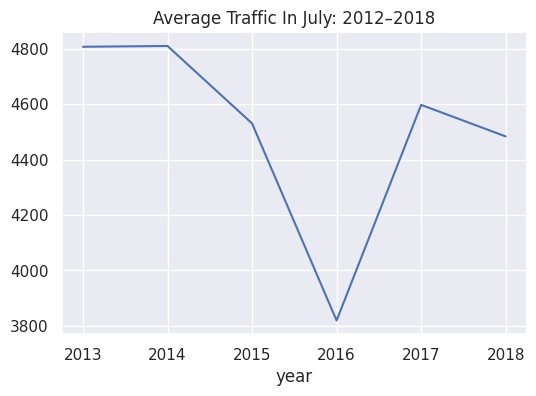

In [20]:
day['year'] = day.loc[:, 'date_time'].dt.year
july_average = day[day['month'] == 7]
july_average = july_average.groupby('year').mean()

july_average['traffic_volume'].plot()
plt.title('Average Traffic In July: 2012–2018')
plt.show()

There is a big dip in July's monthly average traffic in 2016. Looking up the I-96 in July 2016 reveals that there was significant road construction and closures, which may have detoured cars from travelling during this specific month.

Going back to the average traffic by month graphs:

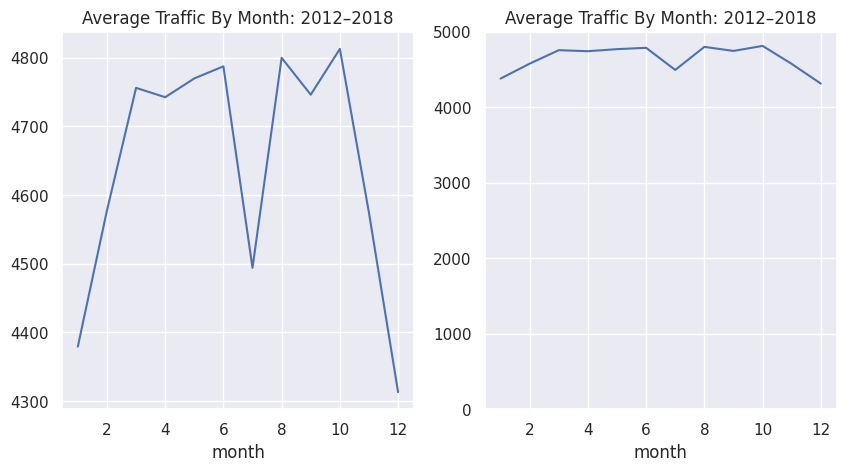

In [11]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
monthly_average['traffic_volume'].plot()
plt.title('Average Traffic By Month: 2012–2018')

plt.subplot(1, 2, 2)
monthly_average['traffic_volume'].plot()
plt.title('Average Traffic By Month: 2012–2018')
plt.ylim(0, 5000)

plt.show()


There does seem to be a pattern with average traffic volume by month, but after adjusting the frequency labels to show the full graph, the change in volume by month is much smaller than originally depicted. As such, I look to other potential variables that may be a stronger indicator of heavy traffic volumes.

#### Day of Week Traffic Average

I now consider another factor: the day of week. Note that 0 corresponds to Monday, 1 to Tuesday, and so on.

In [21]:
day['dayofweek'] = day.loc[:, 'date_time'].dt.dayofweek
dayofweek_average = day.groupby('dayofweek').mean()
dayofweek_average['traffic_volume']


dayofweek
0    4654.143222
1    4949.945727
2    5058.010219
3    5075.290639
4    5085.229148
5    4056.587118
6    3606.582789
Name: traffic_volume, dtype: float64

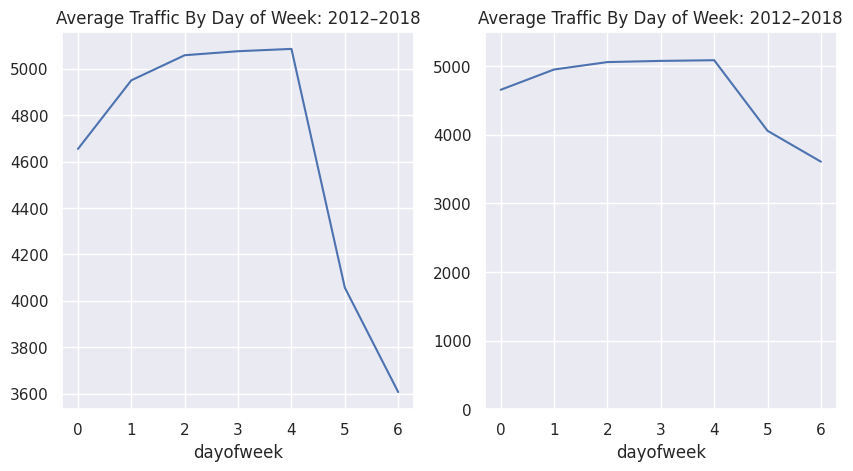

In [13]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
dayofweek_average['traffic_volume'].plot()
plt.title('Average Traffic By Day of Week: 2012–2018')

plt.subplot(1, 2, 2)
dayofweek_average['traffic_volume'].plot()
plt.title('Average Traffic By Day of Week: 2012–2018')
plt.ylim(0, 5500)
plt.show()


There is a very strong pattern in the graph. Most weekdays average over 5000 cars/hour, only to drop to just over 4000 on Saturday and 3600 on Sunday. Even with the y-axis adjusted to show the full graph, the pattern remains very significant, moreso than the pattern with month traffic averages. With more cars commuting to and from school, work, and daily activites on working days than on the more relaxing weekends, this pattern very much makes sense.

Finally, I can consider the specific daytime hours in which traffic volume is heavier.

#### Daytime Hours Traffic Average

Given the significantly differing traffic volumes on the weekend compared to a working day, it makes sense to split the data on daytime hours into two graphs: working days vs. weekends.

In [22]:
day['hour'] = day['date_time'].dt.hour
working = day[day['dayofweek'] <= 4] # Monday to Friday
weekend = day[day['dayofweek'] >= 5] # Saturday and Sunday
hour_average_working = working.groupby('hour').mean()
hour_average_weekend = weekend.groupby('hour').mean()

print(hour_average_working['traffic_volume'])
print('\n')
print(hour_average_weekend['traffic_volume'])

hour
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64


hour
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


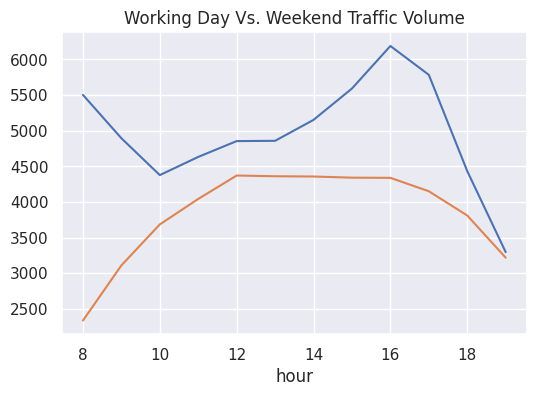

In [15]:
hour_average_working['traffic_volume'].plot()
hour_average_weekend['traffic_volume'].plot()
plt.title('Working Day Vs. Weekend Traffic Volume')
plt.show()

On working days, the traffic volume spikes at or just before 8 a.m. and again at 4 p.m., very likely due to rush hour commutes. For weekends, the traffic peaks and plateaus from around noon to the late afternoon. For every daytime hour, the average working day traffic is greater than the average weekend traffic. In fact, the mean weekday traffic volume is roughly 30% higher than the mean weekend traffic.

To conclude, each of the three time indicators I considered indicated a pattern with heavy traffic, some moreso than others. Average traffic volumes tend to peak in the summer and reach a low in the winter, traffic is significantly less busy during weekends, and weekday rush hours are around roughly 8 a.m. and 4 p.m.

### Influence of Weather on Traffic Volume: Numeric

I can explore the dataset further by considering the impact of weather on I-96 westbound traffic volume. As a few columns, such as `temp`, `rain_1h`, `snow_1h`, and `clouds_all`, are integers or floats, I begin by calculating the correlation between traffic volume and these columns. 

In [16]:
day.corr()[['temp', 'rain_1h', 'snow_1h', 'clouds_all']].iloc[4]

temp          0.133283
rain_1h       0.005001
snow_1h       0.005186
clouds_all   -0.037828
Name: traffic_volume, dtype: float64

There does not appear to be a strong correlation between traffic volume and any individual weather variable. I can confirm this by visualizing the correlations on a scatterplot.

Text(0.5, 1.0, 'Traffic Volume Vs. Clouds Count')

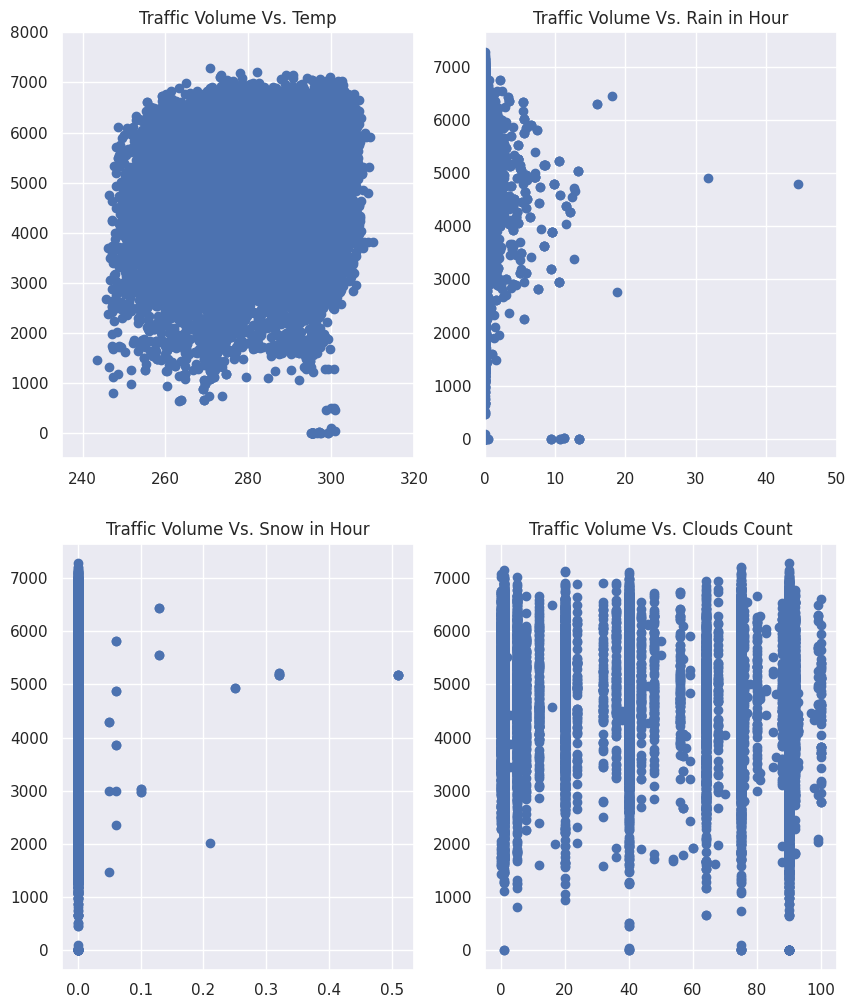

In [17]:
plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 2)

plt.subplot(2, 2, 1)
plt.scatter(day['temp'], day['traffic_volume'])
plt.xlim(235, 320)
plt.ylim(-500, 8000)
plt.title('Traffic Volume Vs. Temp')

plt.subplot(2, 2, 2)
plt.scatter(day['rain_1h'], day['traffic_volume'])
plt.title('Traffic Volume Vs. Rain in Hour')
plt.xlim(0, 50)

plt.subplot(2, 2, 3)
plt.scatter(day['snow_1h'], day['traffic_volume'])
plt.title('Traffic Volume Vs. Snow in Hour')

plt.subplot(2, 2, 4)
plt.scatter(day['clouds_all'], day['traffic_volume'])
plt.title('Traffic Volume Vs. Clouds Count')

As suspected, there is no strong correlation between any of the above weather variables and traffic volume.

### Influence of Weather on Traffic Volume: Categorical

There remain two weather variables to explore: `weather_main` and `weather_description`, both of which are categorical.

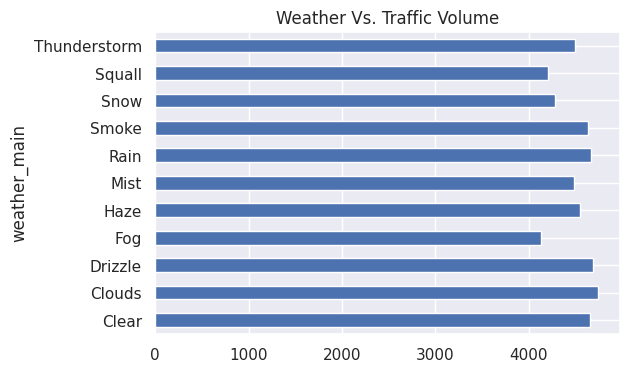

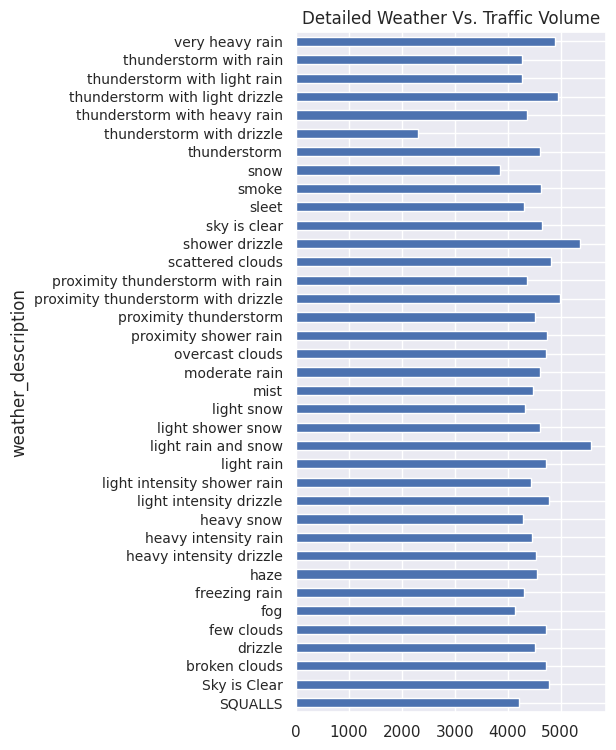

In [18]:
weather_main_average = day.groupby('weather_main').mean()
weather_description_average = day.groupby('weather_description').mean()

weather_main_average['traffic_volume'].plot.barh()
plt.title('Weather Vs. Traffic Volume')
plt.show()

weather_description_average['traffic_volume'].plot.barh(figsize = (4, 9))
plt.yticks(fontsize = 10)
plt.title('Detailed Weather Vs. Traffic Volume')
plt.show()


There does not appear to be any singular main weather type with significantly more or less traffic volume than other types. However, the "shower drizzle" and "light rain and snow" weather descriptions see volumes exceeding 5000 cars/hour. I can hypothesize that people are more likely to drive when the weather is lightly drizzling than with clear weather, when walking or biking are possible. And if the weather becomes more intense than light drizzles, then individuals would end up choosing to stay home. However, more detailed data and analysis are required to confirm or deny my hypothesis.

## Conclusion

I found several key indicators of heavy westbound traffic on the I-96 around the Minneapolis–Saint Paul area:
   - Median daytime traffic is roughly 4× greater than median nighttime traffic
   - By month, average daytime traffic volumes peak during the summer (4800 cars/hour) and dip to a low in the winter (4300 cars/hour)
   - By day of week, weekdays are significantly (an average of 30%) busier than weekends
   - By time of day, weekday traffic peaks during rush hours (8 a.m. and 4 p.m.) while weekend traffic peaks and plateaus from noon to the late afternoon
   - The only possible weather indicators of increased traffic volumes are "shower drizzle" and "light rain and snow"
   
These indicators may serve as a starting point for city planners and other municipal groups to make decisions regarding traffic management. For example, it will help groups make data-backed detour plans to finish a construction project while disrupting traffic as minimally as possible.